In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

In [5]:
k = 10
logits = np.random.normal(size=k)

(-1.1898986221297094, 1.9095009382564476)

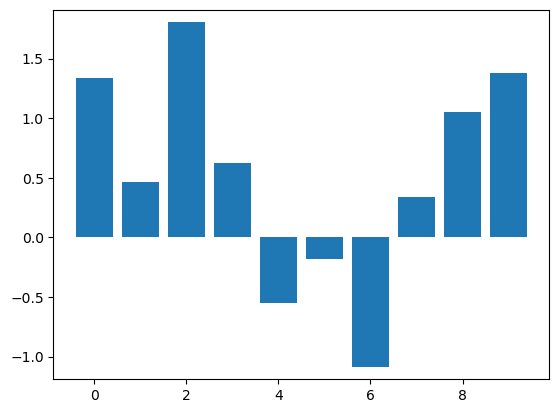

In [9]:
plt.bar(np.arange(k), logits)
plt.ylim(logits.min()-0.1, logits.max() + 0.1)

(8.810101377870291, 11.909500938256448)

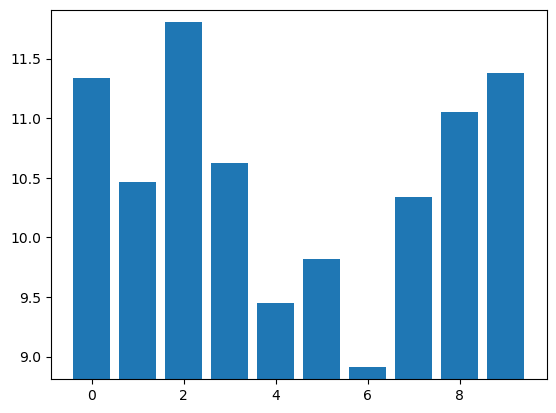

In [10]:
shifted_logits = logits + 10
plt.bar(np.arange(k), shifted_logits)
plt.ylim(shifted_logits.min()-0.1, shifted_logits.max() + 0.1)

In [11]:
def softmax(x):
    exponents = np.exp(x)
    Z = exponents.sum()
    return exponents / Z

In [12]:
softmax(logits)

array([0.16244533, 0.06843048, 0.26165517, 0.07991308, 0.0246525 ,
       0.03569052, 0.01440576, 0.06025884, 0.12269094, 0.16985738])

In [13]:
softmax(shifted_logits)

array([0.16244533, 0.06843048, 0.26165517, 0.07991308, 0.0246525 ,
       0.03569052, 0.01440576, 0.06025884, 0.12269094, 0.16985738])

In [14]:
softmax(logits*0.0001)

array([0.10000815, 0.0999995 , 0.10001292, 0.10000105, 0.09998929,
       0.09999299, 0.09998392, 0.09999823, 0.10000534, 0.10000859])

## Why is the softmax shift-independent?

Consider the softmax function:
$$
\operatorname{softmax}(\mathbf{h})_i = \frac{\exp(h_i)}{\sum_{j=1}^{|h|} \exp(h_j)}
$$

where $\exp$ is the exponential function (i.e $\exp(x) = e^x$). Now consider us adding some scalar constant $C$ to $\mathbf{h}$
$$
\operatorname{softmax}(\mathbf{h} + C)_i = \frac{\exp(h_i+C)}{\sum_{j=1}^{|h|} \exp(h_j+C)}
$$

Du to how exponentials work, this is the same as:
$$
\operatorname{softmax}(\mathbf{h} + C)_i = \frac{\exp(h_i)\exp(C)}{\sum_{j=1}^{|h|} \exp(h_j)\exp(C)} = \frac{\exp(h_i)\cancel{\exp(C)}}{\sum_{j=1}^{|h|} \exp(h_j)\cancel{\exp(C)}}
$$

As you can see, the $\exp(C)$ in the numerator and denominator cancels out. An insight you can draw from this is that the softmax function doesn't care about "where" the logits are located along the number line, it only cares about the relative absolute difference between the components of $\mathbf{h}$

